In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [70]:
data_2015=pd.read_csv(r"2015-HappinessData.csv")
data_2015.head()
# pd.read_csv("2015-HappinessData.csv")


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [71]:
data15Copy=data_2015.copy()

data15Copy.describe()

# help(data15Copy.drop)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [72]:
data15Copy.drop('Country',axis=1,inplace=True)
data15Copy.drop('Happiness Rank',axis=1,inplace=True)
data15Copy.drop('Standard Error',axis=1,inplace=True)
# we need to do something about regions
Y=data15Copy['Happiness Score']
data15Copy.drop('Happiness Score',axis=1,inplace=True)
X=data15Copy.copy().values

In [75]:
print(data15Copy.head())
print()
print()
labelEncoderX = LabelEncoder()
X[:,0]=labelEncoderX.fit_transform(X[:,0])
# do inplace = true please

   Region  Economy (GDP per Capita)   Family  Health (Life Expectancy)  \
0       9                   1.39651  1.34951                   0.94143   
1       9                   1.30232  1.40223                   0.94784   
2       9                   1.32548  1.36058                   0.87464   
3       9                   1.45900  1.33095                   0.88521   
4       5                   1.32629  1.32261                   0.90563   

   Freedom  Trust (Government Corruption)  Generosity  Dystopia Residual  
0  0.66557                        0.41978     0.29678            2.51738  
1  0.62877                        0.14145     0.43630            2.70201  
2  0.64938                        0.48357     0.34139            2.49204  
3  0.66973                        0.36503     0.34699            2.46531  
4  0.63297                        0.32957     0.45811            2.45176  




In [76]:
oneHotEncoder=OneHotEncoder(categorical_features=[0])



In [81]:
print(X[:,0])
print()
print()

X=oneHotEncoder.fit_transform(X).toarray()

[9 9 9 9 5 9 9 9 0 0 4 3 9 3 5 3 9 9 9 4 9 4 3 6 3 9 3 4 9 3 1 3 3 6 4 9 9
 2 4 3 3 3 3 1 1 2 2 3 4 9 3 1 3 1 1 1 3 3 1 1 6 1 4 1 3 9 9 4 1 1 8 2 1 6
 6 4 1 8 7 1 7 4 1 2 8 1 1 9 1 6 8 4 1 8 1 1 8 3 6 2 8 9 4 1 3 1 4 4 7 4 1
 4 8 8 8 8 7 8 3 8 7 8 8 8 8 8 1 8 6 1 8 7 8 1 4 4 8 8 8 8 8 8 8 8 6 8 8 8
 8 8 8 8 7 8 8 4 8 8]




In [85]:
print(X)# X cant be a pandas dataframe now, we need to something extra now
Y=Y.values # having numbers

[[0.      0.      0.      ... 0.41978 0.29678 2.51738]
 [0.      0.      0.      ... 0.14145 0.4363  2.70201]
 [0.      0.      0.      ... 0.48357 0.34139 2.49204]
 ...
 [0.      0.      0.      ... 0.18906 0.47179 0.32858]
 [0.      0.      0.      ... 0.10062 0.19727 1.83302]
 [0.      0.      0.      ... 0.10731 0.16681 1.56726]]


In [96]:
# apply Machine Learning models now

xtrain,xtest,ytrain,ytest=train_test_split(X,Y)
print(type(ytrain))

<class 'numpy.ndarray'>


In [99]:
alg=LR()
alg.fit(X=xtrain,y=ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [101]:
ypred=alg.predict(xtest)

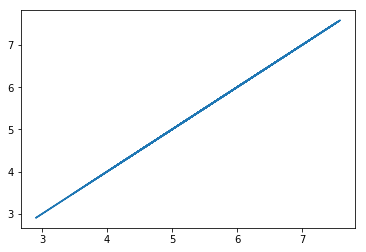

In [106]:
import matplotlib.pyplot as plt

plt.plot(ytest,ypred)
plt.show()